# Compute health expenditures per income level

In [20]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats 
from importlib import reload
import pandas as pd
import pickle
import os
import sys
from statsmodels.formula.api import ols,wls
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [21]:
from model import micro,macro, params
from model import distributions as dist

# Simulated Gradient

In [22]:

file = open('output/eq_pus_ge3.pkl','rb')
eq = pickle.load(file)
file.close()
opt = pd.read_pickle('output/opt_pus_ge3.pkl')

In [23]:
def wmean(x,var):
    xx = x.loc[~x[var].isna(),:]
    names = {var: (xx[var] * xx['ps']).sum()/xx['ps'].sum()} 
    return pd.Series(names, index=[var])

In [24]:
tab_eh = opt.groupby(['h','e']).apply(wmean,var='m').unstack()
tab_eh

m                                                                 \
e         0             1        2         3        4          5         6   
h                                                                            
0  0.525576  7.810403e-01  1.29577  2.689467  7.29176  13.616625  16.92276   
1  0.000000  5.656805e-18  0.00000  0.000000  0.00000   0.000000   0.00000   

                                       
e          7             8          9  
h                                      
0  18.823232  2.058494e+01  22.230655  
1   0.000000  4.268590e-14   0.019326

In [25]:
tab_h = opt.groupby('e').apply(wmean,var='h').unstack()
tab_h

   e
h  0    0.677376
   1    0.719265
   2    0.778303
   3    0.846530
   4    0.910622
   5    0.949463
   6    0.962733
   7    0.965976
   8    0.967188
   9    0.967949
dtype: float64

In [26]:
grad_m_sim = opt.groupby('e').apply(wmean,var='m')
grad_m_sim

,m
e,
0,0.169564
1,0.219266
2,0.287269
3,0.412752
4,0.651721
5,0.688138
6,0.630657
7,0.640445
8,0.675423


In [27]:
grad_m_sim['m'] = grad_m_sim['m']/grad_m_sim.loc[4,'m']-1
grad_m_sim.index = [x for x in range(1,11)]
grad_m_sim

,m
1,-0.739822
2,-0.663559
3,-0.559215
4,-0.366673
5,0.000000
6,0.055878
7,-0.032321
8,-0.017302
9,0.036369
10,0.121999


# Data

In [28]:
df = pd.read_stata('../data_sources/meps/MEPS0004_agghealth.dta', convert_categoricals=False)
df.head()

,duid,dupersid,famidyr,famszeyr,famrfpyr,region53,age,racex,hispan,marry53x,...,nh_diabe,nh_lunge,nh_cancre,smokev,nh_smoken,mergeMEPSNHIS,smoken,totinc,inscov,_merge
0,20002.0,20002014,A,6.0,1.0,4.0,39.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,30000.0,1.0,3
1,20002.0,20002014,A,6.0,1.0,4.0,40.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,25200.0,1.0,3
2,20002.0,20002021,A,6.0,0.0,4.0,16.0,1.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,3.0,3
3,20002.0,20002021,A,6.0,0.0,4.0,17.0,1.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,3.0,3
4,20002.0,20002038,A,6.0,0.0,4.0,14.0,1.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,3.0,3


In [29]:
df.columns.to_list()

['duid',
 'dupersid',
 'famidyr',
 'famszeyr',
 'famrfpyr',
 'region53',
 'age',
 'racex',
 'hispan',
 'marry53x',
 'educyear',
 'totded04',
 'rthlth53',
 'mnhlth53',
 'iadlhp53',
 'adlhlp53',
 'bmindx53',
 'diabdx53',
 'asthdx53',
 'hibpdx53',
 'chddx53',
 'angidx53',
 'midx53',
 'ohrtdx53',
 'strkdx53',
 'emphdx53',
 'adsmok42',
 'tottch04',
 'totexp',
 'totslf',
 'totmcr',
 'totmcd',
 'totprv',
 'totva',
 'tottri04',
 'totofd',
 'totstl04',
 'totwcp',
 'totopr',
 'totopu',
 'totosr',
 'doctim',
 'hsptim',
 'hspnit',
 'perwt',
 'famwt',
 'male',
 'mepsexp',
 'mepsslf',
 'mepsmcr',
 'mepsmcd',
 'mepsprv',
 'mepsva',
 'mepsofd',
 'mepswcp',
 'mepsopr',
 'mepsopu',
 'mepsosr',
 'yr',
 'totded03',
 'tottch03',
 'tottri03',
 'totstl03',
 'totded02',
 'tottch02',
 'tottri02',
 'totstl02',
 'totded01',
 'tottch01',
 'tottri01',
 'totstl01',
 'totded00',
 'tottch00',
 'tottri00',
 'totstl00',
 'cccodex',
 'ncccodex',
 'diabecr',
 'hibpecr',
 'strokecr',
 'heartecr',
 'lungecr',
 'cancrecr',


In [32]:
df = df[df['yr'].isin([2003,2004,2005,2006,2007])]
df = df[(df.age>=35)&(df.age<=75)]
df = df[df.totinc>10e3]
df = df[~df.mepsexp.isna()]
data = df[['totinc','adl1p','age','mepsexp','totmcd','yr','male','obese','diabe','hearte','hibpe','stroke','lunge','perwt','smoken','smokev']].dropna(axis=0)
data['loginc'] = np.log(data['totinc'])
data['m'] = data['mepsexp'] 
data['logm'] = np.log(data.loc[data.m>0,'m'].min() + data['m'])

In [34]:
0.01*data['m'].mean() 

42.62466796875

In [35]:
model = wls('loginc ~ C(age) + C(yr) ',data=data,var_weights=np.asarray(data['perwt'])).fit()
# + smoken + smokev + obese + diabe + stroke + hibpe + lunge + hearte + male 
data.loc[:,'ey'] = model.resid.to_list()
data.ey = (data.ey - data.ey.mean())/data.ey.std()
data['ey'] = data['ey'].clip(lower=-2.5,upper=2.5)
data['ey10'] = pd.cut(data['ey'],bins=10,labels=[x for x in range(1,11)])

/users/loulou/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['var_weights']
  warnings.warn(msg, ValueWarning)


In [36]:
for q in range(1,11):
	data['ey10_'+str(q)] = np.where(data['ey10']==q,1,0)

In [37]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
totinc,8906.0,39530.646980,29307.996623,10001.000000,19410.500000,30834.500000,50118.750000,279668.000000
adl1p,8906.0,0.011678,0.107438,0.000000,0.000000,0.000000,0.000000,1.000000
age,8906.0,51.375365,11.167422,35.000000,42.000000,50.000000,60.000000,75.000000
mepsexp,8906.0,4262.466797,9039.359375,0.000000,361.830154,1484.150269,4296.375122,205658.000000
totmcd,8906.0,260.089939,2611.798043,0.000000,0.000000,0.000000,0.000000,113045.000000
yr,8906.0,2003.534302,0.500991,2003.000000,2003.000000,2004.000000,2004.000000,2004.000000
male,8906.0,0.458567,0.498305,0.000000,0.000000,0.000000,1.000000,1.000000
obese,8906.0,0.299349,0.457999,0.000000,0.000000,0.000000,1.000000,1.000000
diabe,8906.0,0.084101,0.277563,0.000000,0.000000,0.000000,0.000000,1.000000
hearte,8906.0,0.104424,0.305836,0.000000,0.000000,0.000000,0.000000,1.000000


In [38]:
model = wls('logm ~ ey10_1 +ey10_2 + ey10_3 + ey10_4 + ey10_6 + ey10_7 + ey10_8 + ey10_9 + ey10_10 + C(age) + C(yr) ',data=data,var_weights=np.asarray(data['perwt'])).fit()
#+ smoken + smokev + obese + diabe + stroke + hibpe + lunge + hearte + male
model.summary()


/users/loulou/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['var_weights']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   logm   R-squared:                       0.113
Model:                            WLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     22.53
Date:                Fri, 27 May 2022   Prob (F-statistic):          5.21e-190
Time:                        09:09:47   Log-Likelihood:                -20399.
No. Observations:                8906   AIC:                         4.090e+04
Df Residuals:                    8855   BIC:                         4.126e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.7718      0.158     36.427      0.000       5.461       6.082
C(age)[T.36.0]      0.0733      0.200      0.366      0.714      -0.319       0.466
C(age)[T.37.0]     -0.1080      0.202     -0.535      0.593      -0.504       0.288
C(age)[T.38.0]      0.0320      0.201      0.159      0.873      -0.362       0.426
C(age)[T.39.0]     -0.0883      0.201     -0.439      0.661      -0.483       0.306
C(age)[T.40.0]      0.2469      0.199      1.239      0.215      -0.144       0.637
C(age)[T.41.0]      0.2374      0.195      1.215      0.224      -0.146       0.620
C(age)[T.42.0]      0.2928      0.203      1.444      0.149      -0.105       0.690
C(age)[T.43.0]      0.2471      0.204      1.209      0.227      -0.153       0.648
C(age)[T.44.0]      0.5108      0.203      2.520      0.012       0.114       0.908
C(age)[T.45.0]      0.8884      0.200      4.450      0.000       0.497       1.280
C(age)[T.46.0]      0.8845      0.208      4.244      0.000       0.476       1.293
C(age)[T.47.0]      0.6933      0.203      3.414      0.001       0.295       1.091
C(age)[T.48.0]      0.7154      0.208      3.444      0.001       0.308       1.123
C(age)[T.49.0]      0.8715      0.208      4.191      0.000       0.464       1.279
C(age)[T.50.0]      0.9586      0.207      4.638      0.000       0.553       1.364
C(age)[T.51.0]      1.1212      0.211      5.302      0.000       0.707       1.536
C(age)[T.52.0]      1.1587      0.208      5.576      0.000       0.751       1.566
C(age)[T.53.0]      1.1226      0.215      5.211      0.000       0.700       1.545
C(age)[T.54.0]      1.3132      0.213      6.154      0.000       0.895       1.731
C(age)[T.55.0]      1.4092      0.217      6.491      0.000       0.984       1.835
C(age)[T.56.0]      1.1776      0.214      5.509      0.000       0.759       1.597
C(age)[T.57.0]      1.5739      0.218      7.232      0.000       1.147       2.000
C(age)[T.58.0]      1.4938      0.227      6.578      0.000       1.049       1.939
C(age)[T.59.0]      1.9002      0.239      7.956      0.000       1.432       2.368
C(age)[T.60.0]      1.6420      0.235      6.994      0.000       1.182       2.102
C(age)[T.61.0]      1.8924      0.236      8.011      0.000       1.429       2.355
C(age)[T.62.0]      2.0099      0.233      8.636      0.000       1.554       2.466
C(age)[T.63.0]      1.8638      0.243      7.661      0.000       1.387       2.341
C(age)[T.64.0]      1.8437      0.247      7.467      0.000       1.360       2.328
C(age)[T.65.0]      2.3343      0.248      9.413      0.000       1.848       2.820
C(age)[T.66.0]      1.9793      0.246      8.050      0.000       1.497       2.461
C(age)[T.67.0]      2.0425      0.257      7.935      0.000       1.538       2.547
C(age)[T.68.0]      2.2760      0.248      9.195      0.000

In [39]:
grad_m_data_se = model.HC0_se[['ey10_'+str(q) for q in range(1,11) if q!=5]]
grad_m_data_se.index = [x for x in range(1,11) if x!=5]
grad_m_data_se[5] = 0
grad_m_data_se = grad_m_data_se.sort_index()
grad_m_data_se

1     0.156416
2     0.114373
3     0.095196
4     0.090118
5     0.000000
6     0.085721
7     0.090745
8     0.100431
9     0.127536
10    0.131535
dtype: float64

In [40]:
grad_m_data = model.params[['ey10_'+str(q) for q in range(1,11) if q!=5]]
grad_m_data.index = [x for x in range(1,11) if x!=5]
grad_m_data[5] = 0
grad_m_data = grad_m_data.sort_index()
grad_m_data

1    -0.310938
2    -0.524490
3    -0.429465
4    -0.218555
5     0.000000
6     0.182247
7     0.193383
8     0.213062
9     0.136299
10    0.187443
dtype: float64

In [41]:
model = wls('logm ~ ey10_1 +ey10_2 + ey10_3 + ey10_4 + ey10_6 + ey10_7 + ey10_8 + ey10_9 + ey10_10 + C(age) + C(yr)  + smoken + smokev + obese + diabe + stroke + hibpe + lunge + hearte + male',data=data,var_weights=np.asarray(data['perwt'])).fit()
model.summary()

/users/loulou/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['var_weights']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   logm   R-squared:                       0.226
Model:                            WLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     43.67
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        09:09:48   Log-Likelihood:                -19794.
No. Observations:                8906   AIC:                         3.971e+04
Df Residuals:                    8846   BIC:                         4.013e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.0258      0.152     39.556      0.000       5.727       6.324
C(age)[T.36.0]      0.0392      0.187      0.209      0.834      -0.328       0.406
C(age)[T.37.0]     -0.0815      0.189     -0.432      0.666      -0.452       0.289
C(age)[T.38.0]      0.0023      0.188      0.012      0.990      -0.366       0.371
C(age)[T.39.0]     -0.1169      0.188     -0.621      0.534      -0.486       0.252
C(age)[T.40.0]      0.2486      0.186      1.335      0.182      -0.116       0.614
C(age)[T.41.0]      0.1654      0.183      0.905      0.365      -0.193       0.524
C(age)[T.42.0]      0.2213      0.190      1.167      0.243      -0.151       0.593
C(age)[T.43.0]      0.1910      0.191      0.999      0.318      -0.184       0.566
C(age)[T.44.0]      0.3976      0.190      2.097      0.036       0.026       0.769
C(age)[T.45.0]      0.7522      0.187      4.027      0.000       0.386       1.118
C(age)[T.46.0]      0.6286      0.195      3.224      0.001       0.246       1.011
C(age)[T.47.0]      0.4826      0.190      2.540      0.011       0.110       0.855
C(age)[T.48.0]      0.5367      0.194      2.761      0.006       0.156       0.918
C(age)[T.49.0]      0.5856      0.195      3.008      0.003       0.204       0.967
C(age)[T.50.0]      0.5697      0.194      2.943      0.003       0.190       0.949
C(age)[T.51.0]      0.7385      0.198      3.727      0.000       0.350       1.127
C(age)[T.52.0]      0.6739      0.195      3.459      0.001       0.292       1.056
C(age)[T.53.0]      0.6313      0.202      3.125      0.002       0.235       1.027
C(age)[T.54.0]      0.7670      0.200      3.830      0.000       0.374       1.160
C(age)[T.55.0]      0.8264      0.204      4.055      0.000       0.427       1.226
C(age)[T.56.0]      0.7326      0.201      3.653      0.000       0.339       1.126
C(age)[T.57.0]      1.0893      0.204      5.329      0.000       0.689       1.490
C(age)[T.58.0]      0.9662      0.213      4.533      0.000       0.548       1.384
C(age)[T.59.0]      1.2559      0.224      5.596      0.000       0.816       1.696
C(age)[T.60.0]      0.8639      0.221      3.908      0.000       0.431       1.297
C(age)[T.61.0]      1.0555      0.223      4.741      0.000       0.619       1.492
C(age)[T.62.0]      1.3250      0.219      6.051      0.000       0.896       1.754
C(age)[T.63.0]      1.2049      0.229      5.263      0.000       0.756       1.654
C(age)[T.64.0]      1.2446      0.232      5.363      0.000       0.790       1.700
C(age)[T.65.0]      1.4242      0.234      6.084      0.000       0.965       1.883
C(age)[T.66.0]      0.9755      0.232      4.200      0.000       0.520       1.431
C(age)[T.67.0]      1.0702      0.243      4.399      0.000       0.593       1.547
C(age)[T.68.0]      1.2799      0.234      5.466      0.000

In [42]:
grad_m_data_h = model.params[['ey10_'+str(q) for q in range(1,11) if q!=5]]
grad_m_data_h.index = [x for x in range(1,11) if x!=5]
grad_m_data_h[5] = 0
grad_m_data_h = grad_m_data_h.sort_index()
grad_m_data_h

1    -0.530896
2    -0.681907
3    -0.551857
4    -0.233032
5     0.000000
6     0.228472
7     0.287888
8     0.410882
9     0.431045
10    0.518710
dtype: float64

In [43]:
table = pd.DataFrame(index=[x for x in range(1,11)],columns=['sim','mean','se'])
table['sim'] = grad_m_sim 
table['mean_h'] = grad_m_data_h
table['mean'] = grad_m_data
table['se'] = grad_m_data_se 

In [44]:
table['up'] = table['mean'] + 1.96*table['se']
table['low'] = table['mean'] - 1.96*table['se']
table

,sim,mean,se,mean_h,up,low
1,-0.739822,-0.310938,0.156416,-0.530896,-0.004362,-0.617514
2,-0.663559,-0.524490,0.114373,-0.681907,-0.300318,-0.748661
3,-0.559215,-0.429465,0.095196,-0.551857,-0.242880,-0.616049
4,-0.366673,-0.218555,0.090118,-0.233032,-0.041925,-0.395186
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.055878,0.182247,0.085721,0.228472,0.350260,0.014234
7,-0.032321,0.193383,0.090745,0.287888,0.371243,0.015524
8,-0.017302,0.213062,0.100431,0.410882,0.409907,0.016217
9,0.036369,0.136299,0.127536,0.431045,0.386269,-0.113671
10,0.121999,0.187443,0.131535,0.518710,0.445253,-0.070366


/var/folders/h9/sn9_m3953j93s5pv8q78dfvh0000gn/T/ipykernel_6728/3838045957.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-D" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(table.index,table['mean_h'],'-D',color='r',linestyle=':',label='Data (controls for health)')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


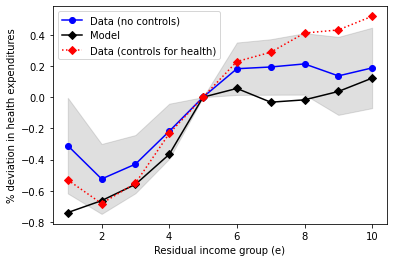

In [45]:
fig, ax = plt.subplots()
ax.plot(table.index,table['mean'],'-o',color='b',label='Data (no controls)')
ax.fill_between(table.index, table['low'], table['up'], color='grey', alpha=.25)
ax.plot(table.index,table['sim'],'-D',color='k',label='Model')
ax.plot(table.index,table['mean_h'],'-D',color='r',linestyle=':',label='Data (controls for health)')
plt.xlabel('Residual income group (e)')
plt.ylabel('% deviation in health expenditures')
plt.legend()
plt.savefig('../figures/fig_d2_spending_by_income.eps', bbox_inches='tight',dpi=1200) 
plt.show()

# Production Function Investigation

In [488]:
def wmean(x,var,wvar):
    xx = x.loc[~x[var].isna(),:]
    names = {var: (xx[var] * xx[wvar]).sum()/xx[wvar].sum()}
    return pd.Series(names, index=[var])

In [499]:
df = pd.read_stata('../data_sources/meps/MEPS0004_agghealth.dta', convert_categoricals=False)
df = df[(df.age>=50)&(df.age<=75)]
df = df[df.totinc>10e3]
df = df[~df.mepsexp.isna()]
data = df[['totinc','adl1p','age','mepsexp','totmcd','yr','perwt']].dropna(axis=0)
data['m'] = data['mepsexp']
nqs = 10
for v in ['totinc','m','adl1p']:
	model = wls(v+' ~ C(age) + C(yr)',data=data).fit()
	print(model.summary())
	data[v] = data[v].mean()+model.resid
data['qy10'] = pd.qcut(data['totinc'],q=nqs,labels=[x for x in range(1,nqs+1)])

                            WLS Regression Results                            
Dep. Variable:                 totinc   R-squared:                       0.036
Model:                            WLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     31.77
Date:                Fri, 27 May 2022   Prob (F-statistic):          9.34e-172
Time:                        15:38:11   Log-Likelihood:            -2.8739e+05
No. Observations:               24585   AIC:                         5.748e+05
Df Residuals:                   24555   BIC:                         5.751e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.047e+04    850.982     

In [500]:
table_inc = data.groupby('qy10').apply(wmean,var='totinc',wvar='perwt')
table_m = data.groupby('qy10').apply(wmean,var='m',wvar='perwt')
table_h = data.groupby('qy10').apply(wmean,var='adl1p',wvar='perwt')
table = pd.concat([table_m,table_inc,table_h],axis=1)

In [501]:
table['lhs'] = -np.log(table['totinc']-table['m'])
table['rhs'] = np.log(table['adl1p'])

In [502]:
table

,m,totinc,adl1p,lhs,rhs
qy10,,,,,
1,5704.409489,9736.314013,0.030254,-8.301994,-3.498117
2,5062.608382,15612.693063,0.019061,-9.263889,-3.960131
3,5425.270781,20183.170152,0.023251,-9.599534,-3.761391
4,5363.768712,23866.689340,0.018706,-9.825684,-3.978934
5,4862.176647,27926.048720,0.013739,-10.046023,-4.287484
6,4654.088022,32897.991195,0.011841,-10.248633,-4.436195
7,5059.624238,39191.088204,0.008488,-10.437975,-4.769057
8,4872.726798,47733.198064,0.009946,-10.665705,-4.610572
9,5016.744444,60975.390602,0.004505,-10.932368,-5.402655


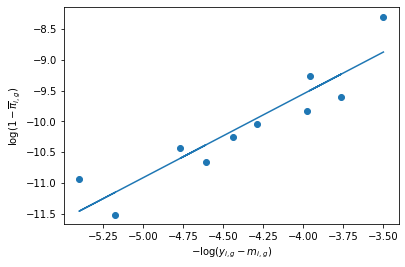

In [503]:
plt.figure()
plt.scatter(table['rhs'],table['lhs'])
m, b = np.polyfit(table['rhs'], table['lhs'], 1)
plt.plot(table['rhs'],table['rhs']*m + b)
plt.xlabel('$-\log(y_{i,g}-m_{i,g})$')
plt.ylabel('$\log(1-\overline{\pi}_{i,g})$')
plt.savefig('../figures/fig_a1_production.eps')
plt.show()

In [504]:
model = ols('lhs ~ rhs',data=table).fit()
model.summary()

/users/loulou/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lhs   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     43.87
Date:                Fri, 27 May 2022   Prob (F-statistic):           0.000165
Time:                        15:38:12   Log-Likelihood:                -3.3449
No. Observations:                  10   AIC:                             10.69
Df Residuals:                       8   BIC:                             11.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1207      0.908     -4.537      0.002      -6.215      -2.026
rhs            1.3589      0.205      6.624      0.000       0.886       1.832
==============================================================================
Omnibus:                        1.662   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.050
Skew:                           0.537   Prob(JB):                        0.591
Kurtosis:                       1.831   Cond. No.                         35.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [495]:
(model.params[1]-0.5)/model.HC0_se[1]

3.822957452418385

In [496]:
1/model.params[1]

0.36222965765550713

In [497]:
(1/(model.params[1]**2))*model.HC0_se[1]

0.07759032081961857

In [498]:
table['rhs2'] = table['rhs']**2
model = ols('lhs ~ rhs + rhs2',data=table).fit()
model.summary()

/users/loulou/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lhs   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     9.375
Date:                Fri, 27 May 2022   Prob (F-statistic):             0.0105
Time:                        15:37:35   Log-Likelihood:                -7.0821
No. Observations:                  10   AIC:                             20.16
Df Residuals:                       7   BIC:                             21.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8955     21.412      0.742      0.482     -34.736      66.527
rhs           11.5976     11.915      0.973      0.363     -16.576      39.771
rhs2           1.2271      1.652      0.743      0.482      -2.679       5.133
==============================================================================
Omnibus:                        0.589   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.555
Skew:                          -0.226   Prob(JB):                        0.758
Kurtosis:                       1.939   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""